In [1]:
import h5py as h5
import tensorflow as tf
import os
import sys
sys.path.append('../nn_builds')
sys.path.append('../scripts')
from ds_making import *

# GPU on
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

# data and model's names
name = 'baikal_multi_0523_flat_pureMC_h5s2_norm.h5'
path_to_h5 = '../data/' + name
regime = 'val'
Shape = (None,6)

2023-08-26 15:29:15.515234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 15:29:16.434786: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/albert/miniconda3/envs/Baikal2/lib/
2023-08-26 15:29:16.434887: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/albert/miniconda3/envs/Baikal2/lib/
2023-08-26 15:29:16.434898: W tensorflow/com

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


Evaluation

In [2]:
#make validation dataset
val_dataset = make_dataset(path_to_h5, regime = 'val', batch_size = 1024, shape=Shape)
#Load model
mn = 'nn_1LSTM_3RB_1LSTM_small'
model_name = mn
model = tf.keras.models.load_model('../models/' + model_name+'/best', compile=False)

2023-08-26 15:29:17.607804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 15:29:18.149811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8428 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:21:00.0, compute capability: 8.6
2023-08-26 15:29:21.895616: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-08-26 15:29:22.220943: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 14 outputs but the _output_shapes attribute specifies shapes for 48 

2023-08-26 15:29:33.681990: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-08-26 15:29:33.698102: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-08-26 15:29:33.776113: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-08-26 15:29:33.790900: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-08-26 15:29:34.215006: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_sh

In [3]:
#compile model
from losses import *
model.compile(loss=focal_loss(2., 2., 10., 1.),
            weighted_metrics=[],
            metrics=[tf.keras.metrics.Recall(class_id=1, name='E_0.5', dtype = tf.float64),
                   tf.keras.metrics.Recall(class_id=0, name='1-S_0.5', dtype = tf.float64),
                   tf.keras.metrics.Recall(class_id=1, thresholds = 0.9, name='E_0.9', dtype = tf.float64),
                   tf.keras.metrics.Recall(class_id=0, thresholds = 1.-0.9, name='1-S_0.9', dtype = tf.float64),
                   'accuracy'])
results = model.evaluate(val_dataset)
#get metrics
print(results)

2023-08-26 15:29:48.950614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-08-26 15:29:49.816105: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


      1/Unknown - 9s 9s/step - loss: 0.0112 - E_0.5: 0.9990 - 1-S_0.5: 0.0000e+00 - E_0.9: 0.9619 - 1-S_0.9: 0.0000e+00 - accuracy: 0.9990

2023-08-26 15:29:50.924419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-26 15:29:51.012507: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


21822/21822 [==============================] - 1241s 56ms/step - loss: 0.0417 - E_0.5: 0.9984 - 1-S_0.5: 0.9109 - E_0.9: 0.9641 - 1-S_0.9: 0.9936 - accuracy: 0.9405
[0.04170621559023857, 0.9984361931930524, 0.9108844529775414, 0.9641150481777263, 0.9936229564366393, 0.9405321478843689]


In [259]:
############################
##Старый тест, жалко убирать
############################
#E and S
#m_E = tf.keras.metrics.Recall(class_id=1, thresholds = xi)
#m_S = tf.keras.metrics.Recall(class_id=0, thresholds = 1.-xi)
#m_E.update_state(labels, p_test)
#m_S.update_state(labels, p_test)
#S = 1.-m_S.result().numpy()
#E = m.result().numpy()
#print(xi,E,S)

Analysis

In [25]:
regime = 'val'
#E and S analysis functions
def load_preds_and_labels(regime):
    proba_nn = np.load('./predictions/preds_' + model_name+'_' + regime+'.npy')
    with h5.File(path_to_h5, 'r') as hf:
        L = proba_nn.shape[0]
        labels = np.zeros((L, 2))
        ids = hf[regime+'/ev_ids_corr/data'][0:L]  # id of event - starting with 'nu' or 'mu'
        ids = np.array([i[0] for i in ids]).reshape(ids.shape[0],1)
        labels = np.where(ids == 110, [0,1], [1,0])  # 110 - byte code for 'n'
    return proba_nn[:,1], labels[:,1]

def separate_preds(preds, labels):
    with h5.File(path_to_h5, 'r') as hf:
        idxs_mu = np.where(labels == 0)[0]
        idxs_nu = np.where(labels == 1)[0]
        preds_mu = preds[idxs_mu]
        preds_nu = preds[idxs_nu]
    return preds_mu, preds_nu

def expos(tr, preds_nu):
        num = np.where(preds_nu>tr, 1, 0)
        num = np.sum(num)
        return num/len(preds_nu)

def suppress(tr, preds_mu):
    num = np.where(preds_mu>tr, 1, 0)
    num = np.sum(num)
    return num/len(preds_mu)

def plot_E_and_S(preds_mu, preds_nu):

        x_tr = np.linspace(0,1,1000)
        y_ex = np.array([expos(tr,preds_nu) for tr in x_tr])
        y_su = np.array([suppress(tr,preds_mu) for tr in x_tr])
        fig, (ax1, ax0) = plt.subplots(1, 2, figsize=(16, 7))
        x_start, x_end = 800, 1000
        #log scale plot
        ax0.plot(x_tr[x_start:x_end], y_ex[x_start:x_end], label = 'Exposure')
        ax0.plot(x_tr[x_start:x_end], y_su[x_start:x_end], label = 'Suppression')
        ax0.set_title("E and S vs classification threshold", fontsize=14)
        ax0.set_xlabel("Threshold", fontsize=14)
        ax0.set_ylabel("E and S values", fontsize=14)
        ax0.set_yscale("log")
        ax0.legend(fontsize=12, loc=0)
        ax0.grid()
        #normal plot
        ax1.plot(x_tr, y_ex, label = 'Exposure')
        ax1.plot(x_tr, y_su, label = 'Suppression')
        ax1.set_title("E and S vs classification threshold", fontsize=14)
        ax1.set_xlabel("Threshold", fontsize=14)
        ax1.set_ylabel("E and S values", fontsize=14)
        ax1.legend(fontsize=12, loc=0)
        ax1.grid()
        #plt.savefig('figures/'+model_name+'_'+regime+'_'+str(x_start/1000)+'_'+str(x_end/1000)+'.png')
        plt.show()
        plt.close(fig)

In [26]:
regime = 'val'
mn = 'nn_1LSTM_3RB_1LSTM_small'

proba_test, labels_test = load_preds_and_labels('test')
proba_val, labels_val = load_preds_and_labels('val')

In [27]:
preds_mu_val, preds_nu_val = separate_preds(proba_val, labels_val)
#print(preds_mu.shape[0]+preds_nu.shape[0]), print(len(labels))

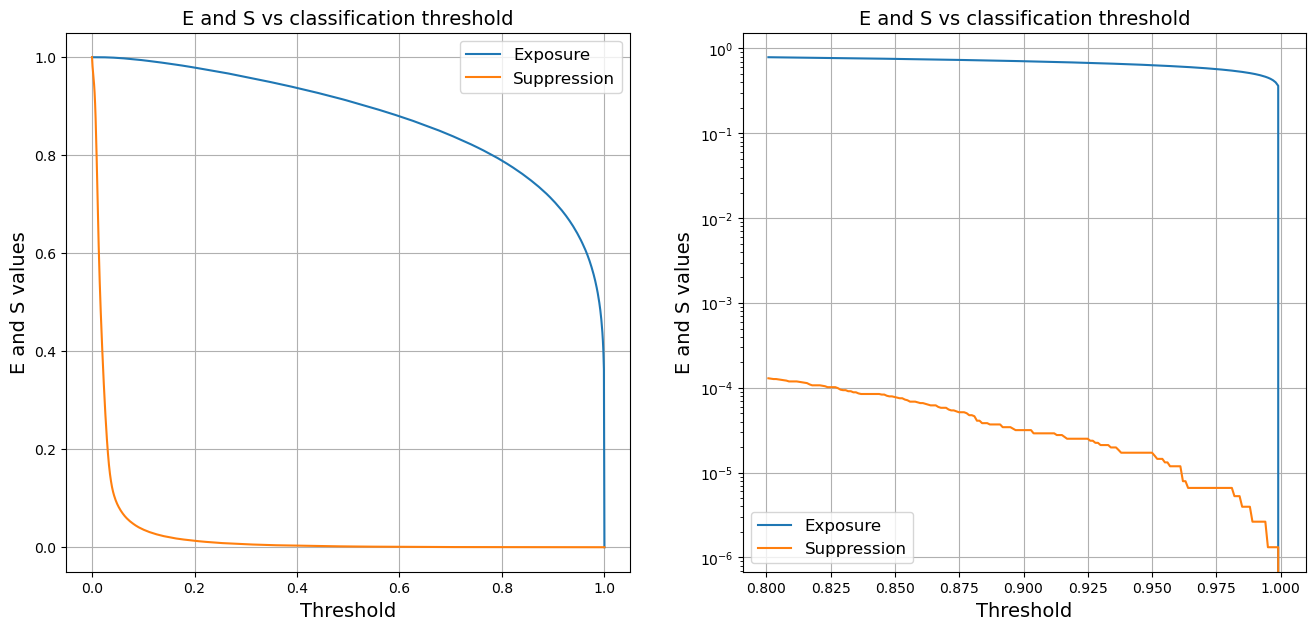

In [28]:
import matplotlib.pyplot as plt
plot_E_and_S(preds_mu_val[::10], preds_nu_val[::10])

In [29]:
print(expos(0.99, preds_nu))

0.4992952436524566


In [30]:
print(suppress(0.99, preds_mu))

1.9825137004913462e-06


In [71]:
#flux task fuctions
def n_xi(proba_nn, xi):
    return len(np.where(proba_nn>xi)[0])

def Metrics_xi(proba_nn, labels, number_of_steps = 10000):
    preds_mu, preds_nu = separate_preds(proba_nn, labels)
    E = np.zeros((0))
    S = np.zeros((0))
    for i in range(number_of_steps):
        E = np.append(E, [expos(i/number_of_steps,preds_nu)], axis = 0)
        S = np.append(S, [suppress(i/number_of_steps,preds_mu)], axis = 0)
    return E,S

def n_nu(proba_nn, E_xi, S_xi, number_of_steps = 10000):
    n_reg = np.zeros((0))
    for i in range(number_of_steps):
        n_reg = np.append(n_reg, [n_xi(proba_nn, i/number_of_steps)], axis = 0)
    n_reg[0] = proba_nn.shape[0]
    return (n_reg-n_reg[0]*S_xi)/(E_xi - S_xi)

def get_D_xi(proba_nn, n_nu_xi, E_xi, S_xi, mu_number_in_test, nu_number_in_test):
    N_xi = n_nu_xi
    N_0 = proba_nn.shape[0]
    E = E_xi
    S = S_xi
    S1 = (N_xi-E*N_0)**2 * (S-S**2) / ((E-S)**4 * mu_number_in_test)
    S2 = (N_xi-S*N_0)**2 * (E-E**2) / ((E-S)**4 * nu_number_in_test)
    S3 = ((1-2*S)*N_xi+N_0*S**2)/(E-S)**2
    return S1+S3+S3

def plot_error_and_flux(x_start, x_end, D_xi, n_nu_xi, nu_number, number_of_steps = 10000):
        x_tr = np.array([i/number_of_steps for i in range(number_of_steps)])
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 7))
        #error plot
        sigma = np.sqrt(D_xi[x_start: x_end])
        ax0.plot(x_tr[x_start: x_end], sigma, label = 'Абс. ошибка числа нейтрино', color = 'red')
        ax0.set_title("Ошибка восстановления потока нейтрино", fontsize=10)
        ax0.set_xlabel("Порог", fontsize=10)
        ax0.set_ylabel("Значение ошибки", fontsize=10)
        ax0.legend(fontsize=8, loc=0)
        ax0.grid()
        #flux plot
        ax1.plot(x_tr[x_start: x_end], (n_nu_xi)[x_start: x_end], label = 'Число нейтрино из формулы')
        ax1.plot(x_tr[x_start: x_end],(nu_number*np.ones(x_tr[x_start:x_end].shape[0])), color = 'green', label = 'Истинное значение числа нейтрино')
        ax1.plot(x_tr[x_start: x_end],(nu_number*np.ones(x_tr[x_start: x_end].shape[0])+sigma), '--', color = 'red', label = 'Рамки погрешности')
        ax1.plot(x_tr[x_start: x_end],(nu_number*np.ones(x_tr[x_start: x_end].shape[0])-sigma), '--', color = 'red')
        ax1.set_title("Ошибка восстановления потока нейтрино", fontsize=10)
        ax1.set_xlabel("Порог", fontsize=10)
        ax1.set_ylabel("Число нейтрино", fontsize=10)
        ax1.legend(fontsize=8, loc=0)
        ax1.grid()
        #plt.savefig('Figures_flux/'+model_name+'_'+regime+'_'+str(x_start/1000)+'_'+str(x_end/1000)+'.png')
        plt.show()

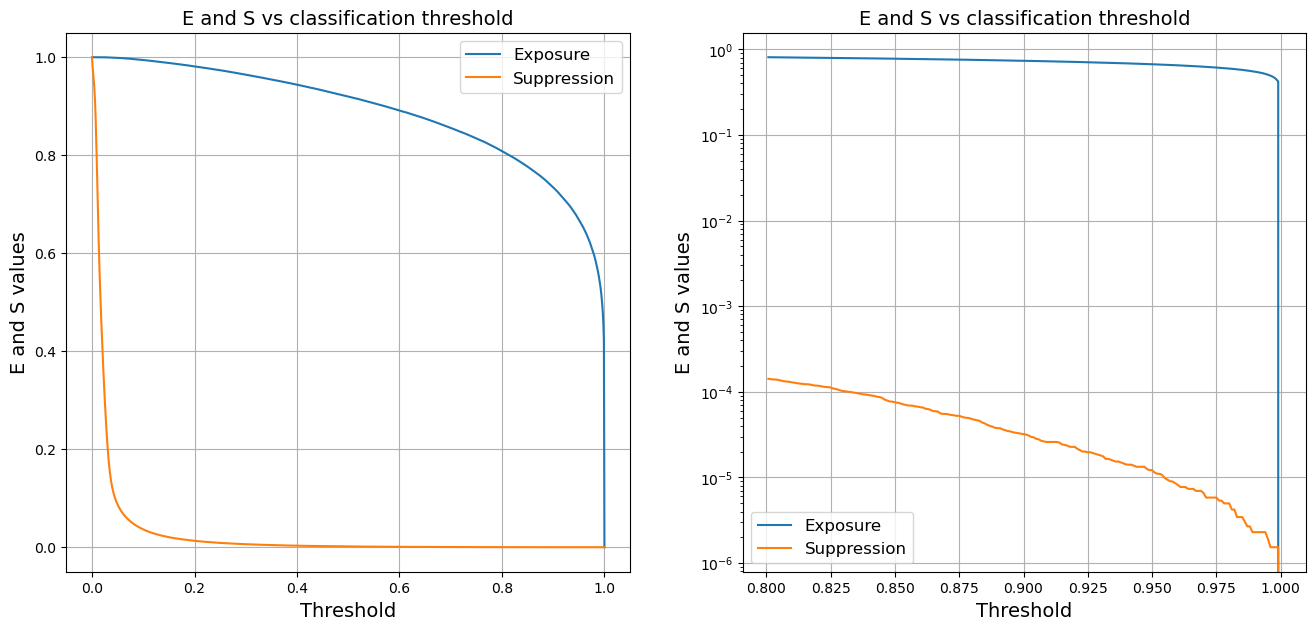

In [72]:
####
# HERE
# 'flux' - data to measure flux
# 'test' - dataset to measure E and S
####
idx_start_nu = -np.sum(labels_val-1)
N_nu_in_flux = 50 #желаемое число нейтрино в потоке
N_mu_in_flux = int(5e6) #желаемое число мюонов в потоке
proba_flux = proba_val[idx_start_nu-N_mu_in_flux : idx_start_nu+N_nu_in_flux]
labels_flux = labels_val[idx_start_nu-N_mu_in_flux : idx_start_nu+N_nu_in_flux]

#объединяем остатки, чтобы лучше померить E и S
proba_test = np.concatenate((proba_test, 
                             proba_val[0:idx_start_nu-N_mu_in_flux],
                             proba_val[idx_start_nu+N_nu_in_flux:0]))
labels_test = np.concatenate((labels_test, 
                              labels_val[0:idx_start_nu-N_mu_in_flux],
                              labels_val[idx_start_nu+N_nu_in_flux:0]))

#объединяем остатки, чтобы лучше померить E и S
preds_mu_test, preds_nu_test = separate_preds(proba_test, labels_test)
preds_mu_flux, preds_nu_flux = separate_preds(proba_flux, labels_flux)
plot_E_and_S(preds_mu_test, preds_nu_test)

In [ ]:
E_xi, S_xi = Metrics_xi(proba_test, labels_test)
n_nu_xi = n_nu(proba_flux, E_xi, S_xi)
mu_number_in_test, nu_number_in_test = preds_mu_test.shape[0], preds_nu_test.shape[0]
mu_number_in_flux, nu_number_in_flux = preds_mu_flux.shape[0], preds_nu_flux.shape[0]
D_xi = get_D_xi(proba_flux, n_nu_xi, E_xi, S_xi, mu_number_in_test, nu_number_in_test)

In [75]:
print('Optimal treshhold =', np.argmin(D_xi[1:]))

Optimal treshhold = 9804


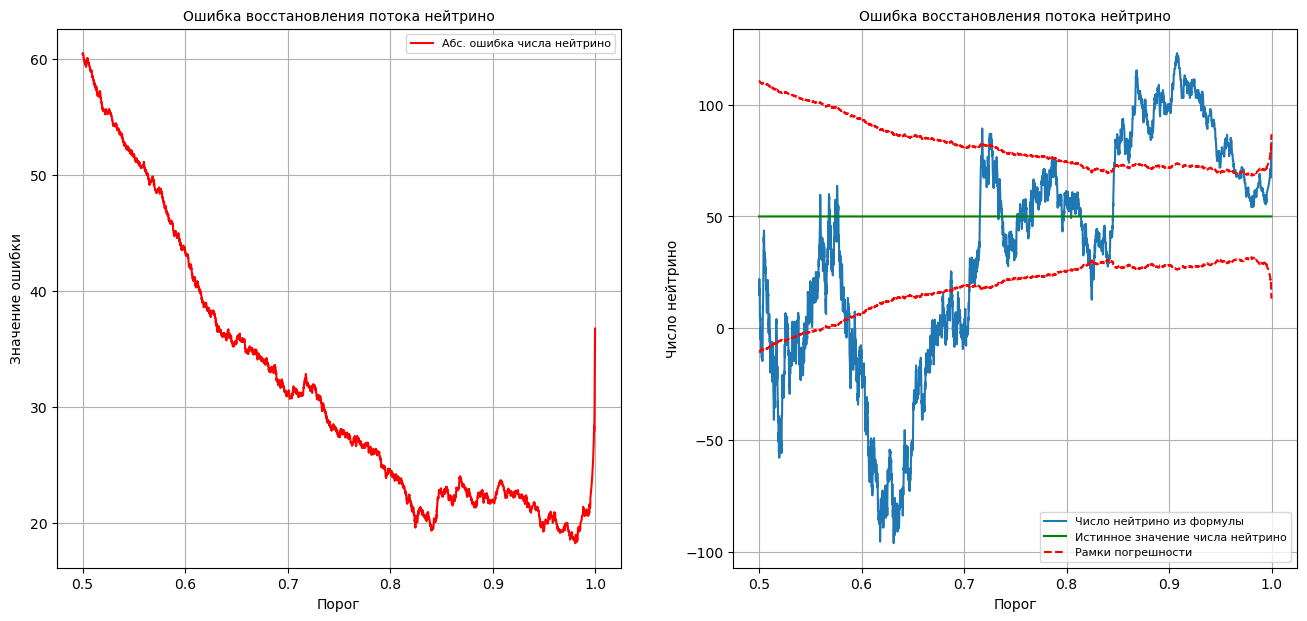

In [76]:
plot_error_and_flux(5000, 9999, D_xi, n_nu_xi, nu_number_in_flux)